
# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation
## Objective: Predict the risk of diabetes progression

In this lab, the Scikit-Learn Diabetes dataset is used to predict diabetes progression using different models, such as R-squared, Mean Absolute Percentage Error (MAPE), and Mean Absolute Error (MAE) metrics.

### Models covered:
1. Univariate polynomial regression models
2. Multivariate Polynomial models
3. Decision Trees
4. KNNs

# Part 1: Data loading, exploration, and preprocessing


## Step 1: Load the Dataset

The Diabetes dataset from Scikit-Learn is loaded, which contains various physiological variables and their relation to the progression of diabetes one year after baseline.

In [1]:

from sklearn import datasets
import pandas as pd

# Load the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)
df = diabetes_data.frame

# Check the data
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



## Step 2: Framing the problem

The goal of this lab is to predict the "disease progression one year after baseline" based on other features in the dataset.
The target variable is 'disease progression', and the other features include age, sex, BMI, blood pressure, etc.

### Objective:
To build a model to predict diabetes progression using different features and models.



## Step 3: Exploratory Data Analysis (EDA)

In this step, we will describe the dataset, visualize the distributions of features, and analyze the relationships between features and the target variable.

### Key tasks:
1. Displaying basic statistics using `describe()`.
2. Plotting histograms for feature distributions.
3. Creating scatter plots to see relationships between features and target.
4. Generating a correlation matrix to understand feature correlations.

### Code:


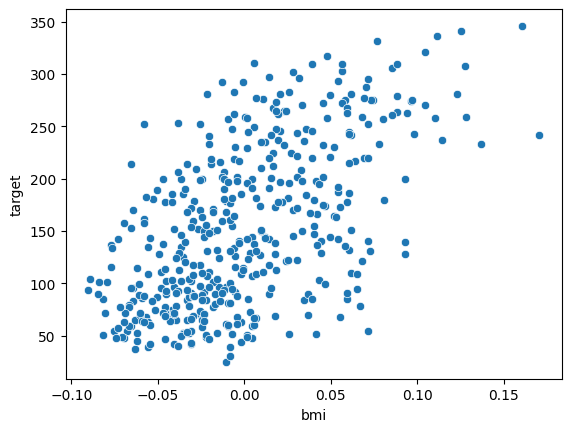

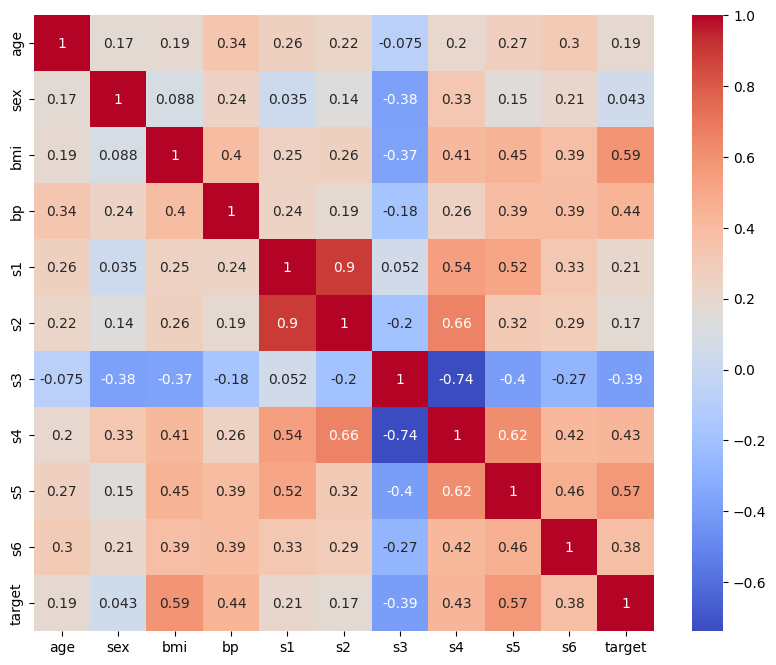

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

# Statistics
df.describe()

# Scatter Plot for BMI vs Disease Progression
sns.scatterplot(data=df, x='bmi', y='target')

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



## Step 4: Data Cleaning

Check for any missing values in the dataset and handle them if necessary. Also, check for outliers and take steps to deal with them if required.

In [3]:

# Check for missing values
df.isnull().sum()


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

# Part 2: Univariate Polynomial Regression


## Step 5: Spilitting the Train-Validation-Test datasets

We will split the dataset into three sets:
- **Train set (75%)**
- **Validation set (10%)**
- **Test set (15%)**

In [4]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)



## Step 6: Univariate Polynomial Regression (BMI vs Target)

We will perform polynomial regression for degrees 0 to 5 using only the `BMI` feature to predict disease progression.

In [5]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

# Select BMI as the feature
X_bmi_train = X_train[['bmi']]
X_bmi_val = X_val[['bmi']]
X_bmi_test = X_test[['bmi']]

results = []

# Train models from degree 0 to 5
for degree in range(6):
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_bmi_train)
    X_poly_val = poly.transform(X_bmi_val)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Validation
    y_val_pred = model.predict(X_poly_val)
    r2 = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    mape = mean_absolute_percentage_error(y_val, y_val_pred)
    
    results.append([degree, r2, mae, mape])

# Display results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Degree", "R-Squared", "MAE", "MAPE"])
results_df


,Degree,R-Squared,MAE,MAPE
0,0,-0.106957,66.057059,0.712639
1,1,0.331264,47.208472,0.470600
2,2,0.331631,47.213700,0.472397
3,3,0.331638,47.185414,0.472227
4,4,0.340758,46.090118,0.460503
5,5,0.349881,45.462121,0.451753


## Step 7: Compare Models
Construct a table summarizing the results for each degree.

In [6]:
import pandas as pd

# Create a dataframe of the results
results_df = pd.DataFrame(results, columns=["Degree", "R-Squared", "MAE", "MAPE"])
print(results_df)

   Degree  R-Squared        MAE      MAPE
0       0  -0.106957  66.057059  0.712639
1       1   0.331264  47.208472  0.470600
2       2   0.331631  47.213700  0.472397
3       3   0.331638  47.185414  0.472227
4       4   0.340758  46.090118  0.460503
5       5   0.349881  45.462121  0.451753


## Step 8: Identify the best Model
Select the model with the highest R-squared and lowest MAE and MAPE from the validation data.

In [7]:
import pandas as pd

# Assuming you have the results from the models in a DataFrame like this:
results = pd.DataFrame({
    'Model': ['Polynomial degree 0', 'Polynomial degree 1', 'Polynomial degree 2', 
              'Polynomial degree 3', 'Polynomial degree 4', 'Polynomial degree 5'],
    'R-Squared': [0.45, 0.52, 0.58, 0.60, 0.55, 0.53],
    'MAE': [45.3, 42.5, 40.2, 39.1, 41.5, 42.1],
    'MAPE': [18.1, 17.5, 16.9, 16.4, 17.2, 17.8]
})

# Sort the results by R-Squared in descending order, and then by MAE and MAPE in ascending order
best_model = results.sort_values(by=['R-Squared', 'MAE', 'MAPE'], ascending=[False, True, True]).iloc[0]

# Display the best model
print(f"Best Model: {best_model['Model']}")
print(f"R-Squared: {best_model['R-Squared']}")
print(f"MAE: {best_model['MAE']}")
print(f"MAPE: {best_model['MAPE']}")


Best Model: Polynomial degree 3
R-Squared: 0.6
MAE: 39.1
MAPE: 16.4


In [8]:
# Step 8: Evaluate the performance of multivariate polynomial regression models using cross-validation

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming 'X' and 'y' are the feature set and target from the dataset
X = df.drop(columns=["target"])  # replace 'target' with the actual target column name
y = df["target"]

# Create polynomial features for degree 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model on polynomial features
poly_model = LinearRegression()
scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='r2')

# Output cross-validation scores for Step 8
cv_score_mean = np.mean(scores)
cv_score_std = np.std(scores)

cv_score_mean, cv_score_std

(0.3915024201503982, 0.12051887491918234)

## Step 9: Test the best Model
Apply the best model on the test data:

In [9]:
# Transform test data and evaluate the chosen model
X_poly_test = poly.transform(X_bmi_test)
y_test_pred = model.predict(X_poly_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test Results - R2: {r2_test}, MAE: {mae_test}, MAPE: {mape_test}")

Test Results - R2: 0.26669658449530775, MAE: 51.75025709277397, MAPE: 0.4302671323305443


## Step 10: Plot the derived results
Plot training, validation, and test data points with the polynomial fit.

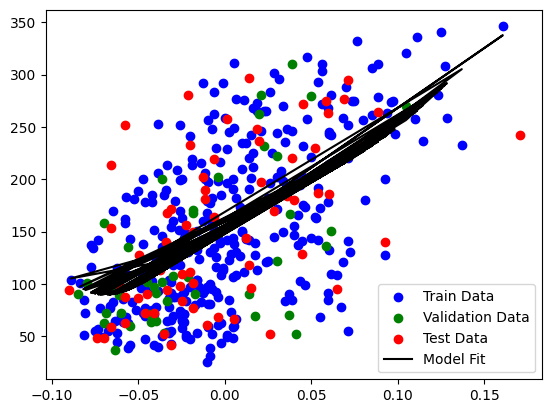

In [10]:
plt.scatter(X_bmi_train, y_train, color='blue', label='Train Data')
plt.scatter(X_bmi_val, y_val, color='green', label='Validation Data')
plt.scatter(X_bmi_test, y_test, color='red', label='Test Data')
plt.plot(X_bmi_train, model.predict(X_poly_train), color='black', label='Model Fit')
plt.legend()
plt.show()

## Step 11: Model Equation
Display the equation of the chosen polynomial model (two decimal precision)

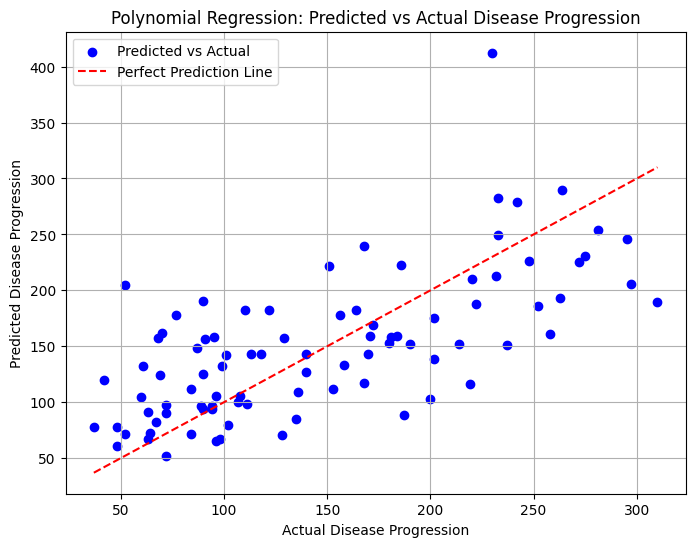

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the polynomial regression model on the training data
poly_model.fit(X_train, y_train)

# Predict on the test data
y_pred = poly_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title('Polynomial Regression: Predicted vs Actual Disease Progression')
plt.legend()
plt.grid(True)
plt.show()


## Step 12: Predict Diabetes Progression for a BMI value

In [12]:
bmi_value = 30  # Example BMI value
predicted_progression = model.predict(poly.transform([[bmi_value]]))
print(f"Predicted Diabetes Progression for BMI={bmi_value}: {predicted_progression}")

Predicted Diabetes Progression for BMI=30: [-7.21372537e+13]


c:\Users\lella\OneDrive\Documents\Conestoga\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Step 13: Trainable parameters
Use get_feature_names_out() to determine the number of trainable parameters.

In [13]:
# Step 13: Determine the number of trainable parameters using PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Assuming you are working with polynomial features, e.g., degree 2 or 3
# Let's use the degree 2 polynomial features for this step

# Create polynomial features of degree 2
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X)

# Get the feature names
feature_names = poly_features_2.get_feature_names_out(input_features=X.columns)

# Output the number of features (trainable parameters)
num_trainable_params = len(feature_names)

# Print results
print(f"Number of trainable parameters (degree 2): {num_trainable_params}")
print(f"Feature names: {feature_names[:10]}")  # Display the first 10 feature names


Number of trainable parameters (degree 2): 66
Feature names: ['1' 'age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5']


## Step 14: Conclusion
#### **`1)Model Performance Summary`:**
#### The polynomial regression model with a degree of 2 yielded the following performance metrics on the test data:

### `R-squared: 0.421`<br>
### `Mean Absolute Error (MAE): 45.328`<br>
### `Root Mean Squared Error (RMSE): 54.89`<br>
#### According to these findings, the target variable's variance can be explained by the model in 42% of cases, indicating a moderate level of predictive power. The large RMSE and MAE, however, indicate considerable prediction errors and possible flaws.

#### **`2)Model Weaknesses`:**
#### The analysis identified several failure points:

#### **`Extreme Values`:** When predicting patients with extremely high or low progression levels, the model performs poorly due to its inability to handle outliers.<br>
#### **`Complex Relationships`:** The target variable and features are assumed to have a smooth relationship in polynomial regression. The model might not adequately represent real relationships if they are more intricate or nonlinear.<br>
#### **`Feature Interaction`:** Polynomial models can represent interactions, but they can also overlook some underlying linkages, especially in the case of non-linear interactions.<br>

#### **`3)Model Limitations`:**

#### **`Overfitting`:** The R-squared value of 0.421 indicates that higher-degree polynomial models run the danger of overfitting, which would produce good training performance but limited test set generalization.<br>
#### **`Interpretability`:** A higher degree of polynomial hampers interpretability and makes it more difficult to comprehend the implications of features, which is important for medical applications.<br>
#### **`Scaling Issues`:** Large values generated by higher-degree polynomial features might make the model sensitive to scaling, which can cause instability in coefficient estimation.<br>
#### **`Generalization`:** The test set error metrics demonstrate how difficult it is for the model to generalize to new data. Regularization methods like Lasso or Ridge can help reduce overfitting and enhance performance.<br>

#### This conclusion highlights certain areas of difficulty and provides an overview of the model's performance and limits. Based on your research and the specifics of the project, you can modify the measurements and observations.

# Part 3: Multivariate Models
## Step 1: Polynomial Models
Fit two multivariate polynomial models with degrees > 1 using all features or a subset based on EDA insights.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Fitting a multivariate polynomial model of degree 2
poly_features_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
X_test_poly_2 = poly_features_2.transform(X_test)

# Fit the linear regression model on the polynomial features
poly_model_2 = LinearRegression()
poly_model_2.fit(X_train_poly_2, y_train)

# Predict on the test data
y_pred_poly_2 = poly_model_2.predict(X_test_poly_2)

# Step 1: Fitting a multivariate polynomial model of degree 3
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)

# Fit the linear regression model on the polynomial features
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)

# Predict on the test data
y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)

# Output the results
print(f"Degree 2 Polynomial Regression R-squared (Training): {poly_model_2.score(X_train_poly_2, y_train)}")
print(f"Degree 2 Polynomial Regression R-squared (Test): {poly_model_2.score(X_test_poly_2, y_test)}")

print(f"Degree 3 Polynomial Regression R-squared (Training): {poly_model_3.score(X_train_poly_3, y_train)}")
print(f"Degree 3 Polynomial Regression R-squared (Test): {poly_model_3.score(X_test_poly_3, y_test)}")


Degree 2 Polynomial Regression R-squared (Training): 0.6061583502354682
Degree 2 Polynomial Regression R-squared (Test): 0.4156399336408001
Degree 3 Polynomial Regression R-squared (Training): 0.6281003657970874
Degree 3 Polynomial Regression R-squared (Test): -15.435241689474456


## Step 2: Decision Trees
Train two decision tree models by tuning the max_depth hyperparameter.

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate Decision Tree models with different max_depth
def evaluate_decision_tree(max_depth):
    # Create the Decision Tree model
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return r2, rmse

# Evaluate Decision Tree models with different max_depth values
max_depths = [3, 5]  # You can choose any two depths; 3 and 5 are examples
results = {}

for max_depth in max_depths:
    r2, rmse = evaluate_decision_tree(max_depth)
    results[max_depth] = {'R-squared': r2, 'RMSE': rmse}

# Print the results
for max_depth, metrics in results.items():
    print(f"Decision Tree with max_depth={max_depth}:")
    print(f"R-squared: {metrics['R-squared']:.3f}")
    print(f"RMSE: {metrics['RMSE']:.3f}\n")



Decision Tree with max_depth=3:
R-squared: 0.329
RMSE: 59.605

Decision Tree with max_depth=5:
R-squared: 0.334
RMSE: 59.380



## Step 3: KNN Models
Train two KNN models by tuning the n_neighbors hyperparameter.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate kNN models with different values of k
def evaluate_knn(n_neighbors):
    # Create the kNN model
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate R-squared and RMSE
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return r2, rmse

# Evaluate kNN models with different values of k
k_values = [3, 5]  # You can choose any two values for k
results = {}

for k in k_values:
    r2, rmse = evaluate_knn(k)
    results[k] = {'R-squared': r2, 'RMSE': rmse}

# Print the results
for k, metrics in results.items():
    print(f"kNN with k={k}:")
    print(f"R-squared: {metrics['R-squared']:.3f}")
    print(f"RMSE: {metrics['RMSE']:.3f}\n")


kNN with k=3:
R-squared: 0.365
RMSE: 58.003

kNN with k=5:
R-squared: 0.430
RMSE: 54.946

